# 🌸 Iris Flower Classification
**Author: Nivedita Tiwari**
Beginner-friendly ML project: dataset loading, EDA, Logistic Regression model, evaluation, and saving artifacts.

Install packages (uncomment if needed)
!pip install -q scikit-learn pandas matplotlib

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib  # for saving model


In [5]:
# Create project folder structure in Colab VM
project_name = "Iris-Flower-Classification"
if not os.path.exists(project_name):
    os.makedirs(project_name)
    print(f"Created folder: {project_name}")
else:
    print(f"Folder already exists: {project_name}")


Created folder: Iris-Flower-Classification


In [6]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['target_name'] = df['target'].apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [7]:
# Basic stats
print("Shape:", df.shape)
display(df.describe())

# Class distribution
print("\nClass distribution:")
print(df['target_name'].value_counts())

Shape: (150, 6)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000



Class distribution:
target_name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


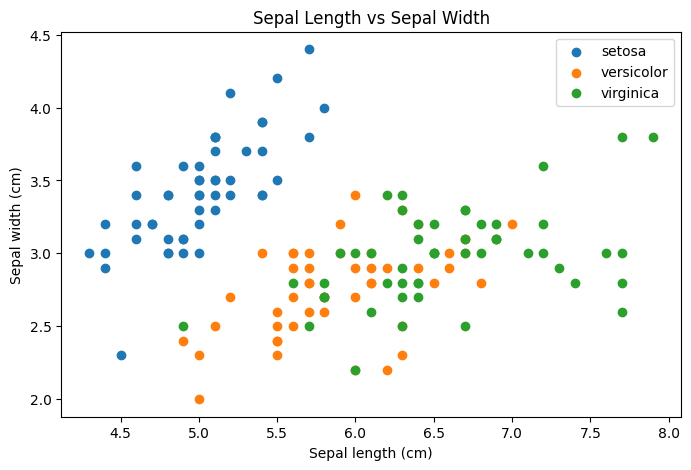

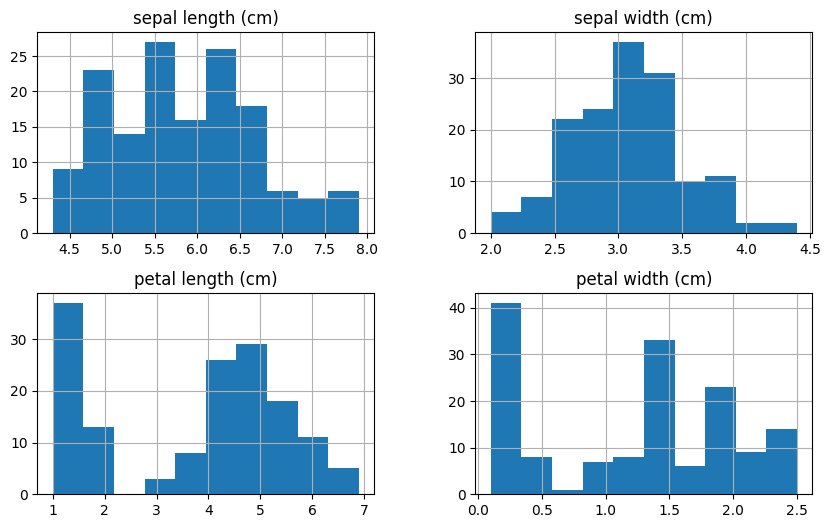

In [8]:
# Pairwise scatter for first two features (simple)
plt.figure(figsize=(8,5))
for t, label in enumerate(iris.target_names):
    subset = df[df['target'] == t]
    plt.scatter(subset['sepal length (cm)'], subset['sepal width (cm)'], label=label)
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title('Sepal Length vs Sepal Width')
plt.legend()
plt.show()

# Histogram of features
df[iris.feature_names].hist(figsize=(10,6))
plt.show()

In [9]:
X = df[iris.feature_names]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)


Train shape: (105, 4) Test shape: (45, 4)


In [10]:
# Train a simple Logistic Regression
model = LogisticRegression(max_iter=200, solver='liblinear')  # liblinear good for small datasets
model.fit(X_train, y_train)

# Predict & evaluate
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))

Test Accuracy: 0.9111

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.73      0.85        15
   virginica       0.79      1.00      0.88        15

    accuracy                           0.91        45
   macro avg       0.93      0.91      0.91        45
weighted avg       0.93      0.91      0.91        45



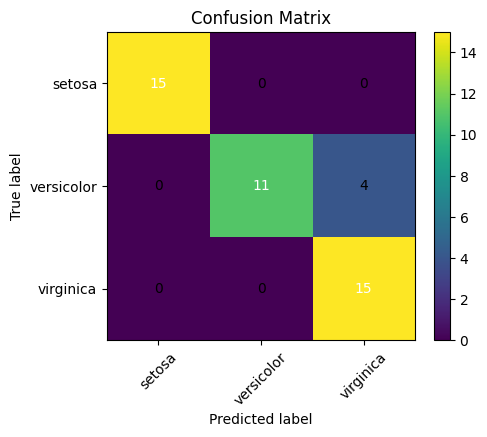

In [11]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
plt.imshow(cm, interpolation='nearest')
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks(np.arange(len(iris.target_names)), iris.target_names, rotation=45)
plt.yticks(np.arange(len(iris.target_names)), iris.target_names)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i,j], ha="center", va="center", color="white" if cm[i,j]>cm.max()/2 else "black")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()


In [12]:
# Save trained model
model_path = os.path.join(project_name, "iris_logistic_model.joblib")
joblib.dump(model, model_path)
print("Saved model to:", model_path)

# Save a CSV copy of the dataset
df.to_csv(os.path.join(project_name, "iris_dataset.csv"), index=False)
print("Saved dataset CSV.")


Saved model to: Iris-Flower-Classification/iris_logistic_model.joblib
Saved dataset CSV.


In [14]:
# requirements.txt
requirements = """numpy
pandas
matplotlib
scikit-learn
joblib
"""
with open(os.path.join(project_name, "requirements.txt"), "w") as f:
    f.write(requirements)
print("Created requirements.txt")

# README.md content
readme_text = f""" # 🌸 Iris Flower Classification

A simple Machine Learning project by **Nivedita Tiwari**.

## Project overview
This project uses the Iris dataset to classify flower species (setosa, versicolor, virginica) using Logistic Regression.

## Files
- `iris_classification.ipynb` — Notebook with code and explanation
- `iris_dataset.csv` — Dataset used
- `iris_logistic_model.joblib` — Trained model
- `requirements.txt` — Python dependencies

## How to run
1. Install dependencies:
"""

Created requirements.txt


In [18]:
readme_text += """
2. Open the notebook `iris_classification.ipynb` and run all cells.

## Author
Nivedita Tiwari
"""
with open(os.path.join(project_name, "README.md"), "w") as f:
    f.write(readme_text)
print("Created README.md")

Created README.md


In [19]:
# Save this Colab notebook as an .ipynb file inside project folder
# The Colab runtime provides an environment variable for the notebook path rarely; we'll use the notebook API if available.
try:
    from google.colab import drive
    # Save the notebook via the drive mount approach is optional — otherwise user can download manually
    print("To save the notebook file (.ipynb), use File -> Download .ipynb in the Colab UI.")
except Exception as e:
    print("If running outside Colab, use your notebook UI to save the .ipynb file.")

To save the notebook file (.ipynb), use File -> Download .ipynb in the Colab UI.
